In [ ]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt

#giusto per capire come funziona ipywidgets
def f(m):
    x=np.linspace(-3,3,1000)
    y=m*x
    
    plt.plot(x,y)
    
ipywidgets.interact(f,m=(-2,2,0.1))

: 

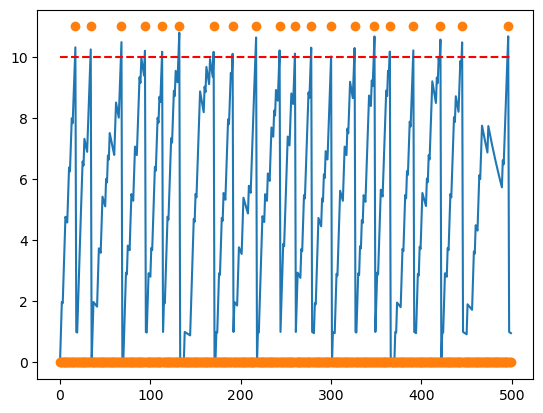

In [3]:
step=500

IN=np.zeros(step)
freq=0.5
mask = np.random.random(step)
IN[mask<freq] = 1.0

def LIF_neuron(tau,V_th,W):
    beta=np.exp(-1/tau)
    U=0
    U_rec=[]
    S_rec=[]
    for t in range(step):
        U=beta*U+W*IN[t]
        U_rec.append(U)
        S=0
        if U>V_th:
            U=0
            S=1
        S_rec.append(S)
    x=range(step)
    plt.plot(x,U_rec,x,V_th*np.ones(step),'r--',x,1.1*V_th*np.array(S_rec),'o')
    
LIF_neuron(tau=50,V_th=10,W=1)

In [4]:
step=500

def LIF_neuron(tau,V_th,W,in_freq):
    beta=np.exp(-1/tau)
    U=0
    IN=np.zeros(step)
    mask = np.random.random(step)
    IN[mask<in_freq] = 1.0
    
    U_rec=[]
    S_rec=[]
    for t in range(step):
        U=beta*U+W*IN[t]
        U_rec.append(U)
        S=0
        if U>V_th:
            U=0
            S=1
        S_rec.append(S)
    x=range(step)
    plt.plot(x,U_rec,x,V_th*np.ones(step),'r--',x,1.1*V_th*np.array(S_rec),'o')
    
    print(f'fout:{sum(np.array(S_rec))/step}') 
 

ipywidgets.interact(LIF_neuron,tau=(1,50,1),V_th=(10,50,1),W=(1,50,1),in_freq=(0,1,0.1))


interactive(children=(IntSlider(value=25, description='tau', max=50, min=1), IntSlider(value=30, description='…

<function __main__.LIF_neuron(tau, V_th, W, in_freq)>

In [42]:
step=500

def LIF_neuron(tau,V_th,W,in_freq):
    beta=np.exp(-1/tau)
    U=0
    IN=np.zeros(step)
    mask = np.random.random(step)
    IN[mask<in_freq] = 1.0
    
    U_rec=[]
    S_rec=[]
    for t in range(step):
        U=beta*U+W*IN[t]
        U_rec.append(U)
        S=0
        if U>V_th:
            U=0
            S=1
        S_rec.append(S)
    x=range(step)
    fout=sum(np.array(S_rec))/step
    return fout

def fout(tau,V_th,W,N):
    fout=[]
    fin=np.linspace(0,1,1000)
    for f in fin:
        fout.append(LIF_neuron(tau,V_th,W,f))
    
    fout=np.convolve(fout, np.ones(N)/N, mode='valid')

    plt.plot(fin[0:fout.shape[0]],fout)    
    

ipywidgets.interact(fout,tau=(1,50,1),V_th=(10,50,1),W=(1,100,1),N=(1,500,1))

interactive(children=(IntSlider(value=25, description='tau', max=50, min=1), IntSlider(value=30, description='…

<function __main__.fout(tau, V_th, W, N)>

In [22]:
#dfout/dfin
step=1500

def LIF_neuron(tau,V_th,W,in_freq):
    beta=np.exp(-1/tau)
    U=0
    IN=np.zeros(step)
    mask = np.random.random(step)
    IN[mask<in_freq] = 1.0
    
    U_rec=[]
    S_rec=[]
    for t in range(step):
        U=beta*U+W*IN[t]
        U_rec.append(U)
        S=0
        if U>V_th:
            U=0
            S=1
        S_rec.append(S)
    x=range(step)
    fout=sum(np.array(S_rec))/step
    return fout

def d_fout(tau,V_th,W,N):
    df=1/1000
    fin=np.arange(0,1,df)
    dfout=[]
    fout_old=0
    for i in range(int(1/df)):
        fout_new=LIF_neuron(tau,V_th,W,fin[i])
        dfout.append((fout_new-fout_old)/df)
        fout_old=fout_new
    dfout=np.convolve(dfout, np.ones(N)/N, mode='valid')

    plt.plot(fin[0:dfout.shape[0]],dfout)

ipywidgets.interact(d_fout,tau=(1,50,1),V_th=(10,50,1),W=(1,100,1),N=(1,500,1))

interactive(children=(IntSlider(value=25, description='tau', max=50, min=1), IntSlider(value=30, description='…

<function __main__.d_fout(tau, V_th, W, N)>

In [35]:
#dfout/dW
step=1500

def LIF_neuron(tau,V_th,W,in_freq):
    beta=np.exp(-1/tau)
    U=0
    IN=np.zeros(step)
    mask = np.random.random(step)
    IN[mask<in_freq] = 1.0
    
    U_rec=[]
    S_rec=[]
    for t in range(step):
        U=beta*U+W*IN[t]
        U_rec.append(U)
        S=0
        if U>V_th:
            U=0
            S=1
        S_rec.append(S)
    x=range(step)
    fout=sum(np.array(S_rec))/step
    return fout

def d_fout(tau,V_th,fin,N):
    dw=0.1
    W=np.arange(0,100,dw)
    dfout=[]
    fout_old=0
    for i in range(int(100/dw)):
        fout_new=LIF_neuron(tau,V_th,W[i],fin)
        dfout.append(np.abs((fout_new-fout_old)/dw))
        fout_old=fout_new
    
    dfout=np.convolve(dfout,np.ones(N)/N, mode='valid')
    plt.plot(W[0:dfout.shape[0]],dfout)

ipywidgets.interact(d_fout,tau=(1,50,1),V_th=(10,50,1),fin=(0,1,0.01),N=(2,10,1))

interactive(children=(IntSlider(value=25, description='tau', max=50, min=1), IntSlider(value=30, description='…

<function __main__.d_fout(tau, V_th, fin, N)>

In [41]:
#fout(W)

step=500

def LIF_neuron(tau,V_th,W,in_freq):
    beta=np.exp(-1/tau)
    U=0
    IN=np.zeros(step)
    mask = np.random.random(step)
    IN[mask<in_freq] = 1.0
    
    U_rec=[]
    S_rec=[]
    for t in range(step):
        U=beta*U+W*IN[t]
        U_rec.append(U)
        S=0
        if U>V_th:
            U=0
            S=1
        S_rec.append(S)
    x=range(step)
    fout=sum(np.array(S_rec))/step
    return fout

def fout(tau,V_th,fin,N):
    fout=[]
    W=np.arange(0,2*V_th,0.1)
    for w in W:
        fout.append(LIF_neuron(tau,V_th,w,fin))
    
    fout=np.convolve(fout, np.ones(N)/N, mode='valid')

    plt.plot(W[0:fout.shape[0]],fout)    
    

ipywidgets.interact(fout,tau=(1,50,1),V_th=(10,50,1),fin=(0,1,0.1),N=(1,10,1))

interactive(children=(IntSlider(value=25, description='tau', max=50, min=1), IntSlider(value=30, description='…

<function __main__.fout(tau, V_th, fin, N)>